In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [2]:
cnx = sqlite3.connect('database.sqlite') 
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx) 

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.shape

(183978, 42)

In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [7]:
# Checking missing values
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [8]:
# Calculating % of missing values:
row = df.shape[0]
for i in df.columns:
    print('{}: {}'.format(i, (df[i].isnull().sum() / row)))

id: 0.0
player_fifa_api_id: 0.0
player_api_id: 0.0
date: 0.0
overall_rating: 0.004544021567796149
potential: 0.004544021567796149
preferred_foot: 0.004544021567796149
attacking_work_rate: 0.017556446966485124
defensive_work_rate: 0.004544021567796149
crossing: 0.004544021567796149
finishing: 0.004544021567796149
heading_accuracy: 0.004544021567796149
short_passing: 0.004544021567796149
volleys: 0.01474632836534803
dribbling: 0.004544021567796149
curve: 0.01474632836534803
free_kick_accuracy: 0.004544021567796149
long_passing: 0.004544021567796149
ball_control: 0.004544021567796149
acceleration: 0.004544021567796149
sprint_speed: 0.004544021567796149
agility: 0.01474632836534803
reactions: 0.004544021567796149
balance: 0.01474632836534803
shot_power: 0.004544021567796149
jumping: 0.01474632836534803
stamina: 0.004544021567796149
strength: 0.004544021567796149
long_shots: 0.004544021567796149
aggression: 0.004544021567796149
interceptions: 0.004544021567796149
positioning: 0.004544021567

As the % of missing values is quite less, we can drop missing values

In [9]:
df = df.dropna()

Now if we check the null values and number of rows, we will see that there are no null values and number of rows decreased accordingly.

In [10]:
print(row)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

To find exactly how many lines we removed, we need to subtract the current number of rows in our data frame from the original number of rows.

In [11]:
row - df.shape[0]

3624

In [12]:
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [13]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
0,48.0,67.0
1,48.0,67.0
2,48.0,62.0
3,47.0,61.0
4,47.0,61.0
5,59.0,74.0
6,59.0,74.0
7,59.0,73.0
8,59.0,73.0
9,59.0,73.0


Next, we will check if 'penalties' is correlated to 'overall_rating'. We are using within the correlation function.

In [14]:
df['overall_rating'].corr(df['penalties'])

0.39271510791118647

We see that Pearson's Correlation Coefficient for these two columns is 0.39.

Pearson goes from -1 to +1. A value of 0 would have told there is no correlation, so we shouldn’t bother looking at that attribute. A value of 0. shows some correlation, although it could be stronger.

In [15]:
# Create a list of potential Features that you want to measure correlation with
potentialFeatures  = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [16]:
for fc in potentialFeatures:
    related = df['overall_rating'].corr(df[fc])
    print("%s: %f" % (fc,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


Looking at the values printed by the previous cell, we notice that the to two are "ball_control" (0.44) and "shot_power" (0.43). So these two features seem to have higher correlation with "overall_rating".

### Data Visualization:

- Next we will start plotting the correlation coefficients of each feature with "overall_rating". We start by selecting the columns and creating a list with correlation coefficients, called "correlations".

In [17]:
correlation_matrix  = df.corr()
correlation_matrix["overall_rating"].sort_values(ascending=False)

overall_rating        1.000000
reactions             0.771856
potential             0.765435
short_passing         0.458243
ball_control          0.443991
long_passing          0.434525
vision                0.431493
shot_power            0.428053
penalties             0.392715
long_shots            0.392668
positioning           0.368978
volleys               0.361739
curve                 0.357566
crossing              0.357320
dribbling             0.354191
free_kick_accuracy    0.349800
finishing             0.330079
stamina               0.325606
aggression            0.322782
strength              0.315684
heading_accuracy      0.313324
jumping               0.258978
sprint_speed          0.253048
interceptions         0.249094
acceleration          0.243998
agility               0.239963
standing_tackle       0.163986
balance               0.160211
marking               0.132185
sliding_tackle        0.128054
gk_kicking            0.028799
gk_diving             0.027675
gk_posit

In [18]:
columns = ['potential',  'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 
           'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 
           'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 
           'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 
           'gk_kicking', 'gk_positioning', 'gk_reflexes']

In [19]:
correlations = [ df['overall_rating'].corr(df[f]) for f in columns ]

### Graph or Ploting

In [20]:
def plot_dataframe(df, y_label):  
    color='red'
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); 
    plt.show()

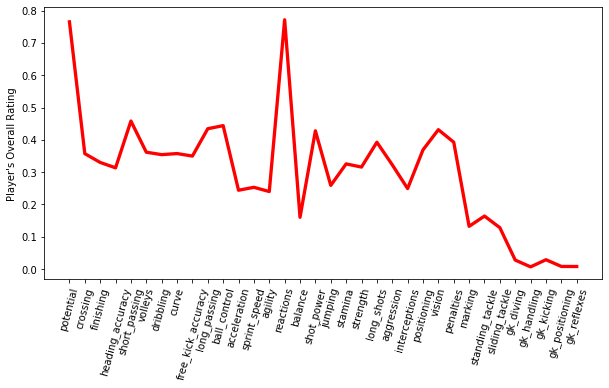

In [21]:
df1 = pd.DataFrame({'attributes': columns, 'correlation': correlations})
plot_dataframe(df1, 'Player\'s Overall Rating')
plt.xkcd()

### Preprocessing

In [22]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [23]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [24]:
def preprocess_inputs(df):
    df1 = df.copy()
    
    # Drop unused columns
    df1 = df1.drop(columns=['id', 'player_fifa_api_id', 'date'])
    
    # Get categorical data
    categoricals = df1.groupby(by = 'player_api_id', as_index = False)[[
        'player_api_id', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']].head(1)
    
    # Clean categorical columns
    for columns in ['attacking_work_rate', 'defensive_work_rate']:
        categoricals[columns] = categoricals[columns].apply(lambda x: np.NaN if x not in ['low', 'medium', 'high'] else x)
        categoricals[columns] = categoricals[columns].fillna(categoricals[columns].mode()[0])
        
    # Take the average numeric stats within groups and merge with categorical columns
    df1 = df1.groupby(by='player_api_id').mean()
    df1 = df1.merge(categoricals, on='player_api_id')
    
    # Binary encoding:
    df1['preferred_foot'] = df1['preferred_foot'].replace({'left': 0, 'right': 1})
    
    # One-hot encoding
    for column in ['attacking_work_rate', 'defensive_work_rate']:
        df1 = onehot_encode(df1, column=column)
    
    return df1

In [25]:
processed_data = preprocess_inputs(df)

In [26]:
# Split df into X and y
y = processed_data['overall_rating']
X = processed_data.drop('overall_rating', axis=1)

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

### Linear Regression Model

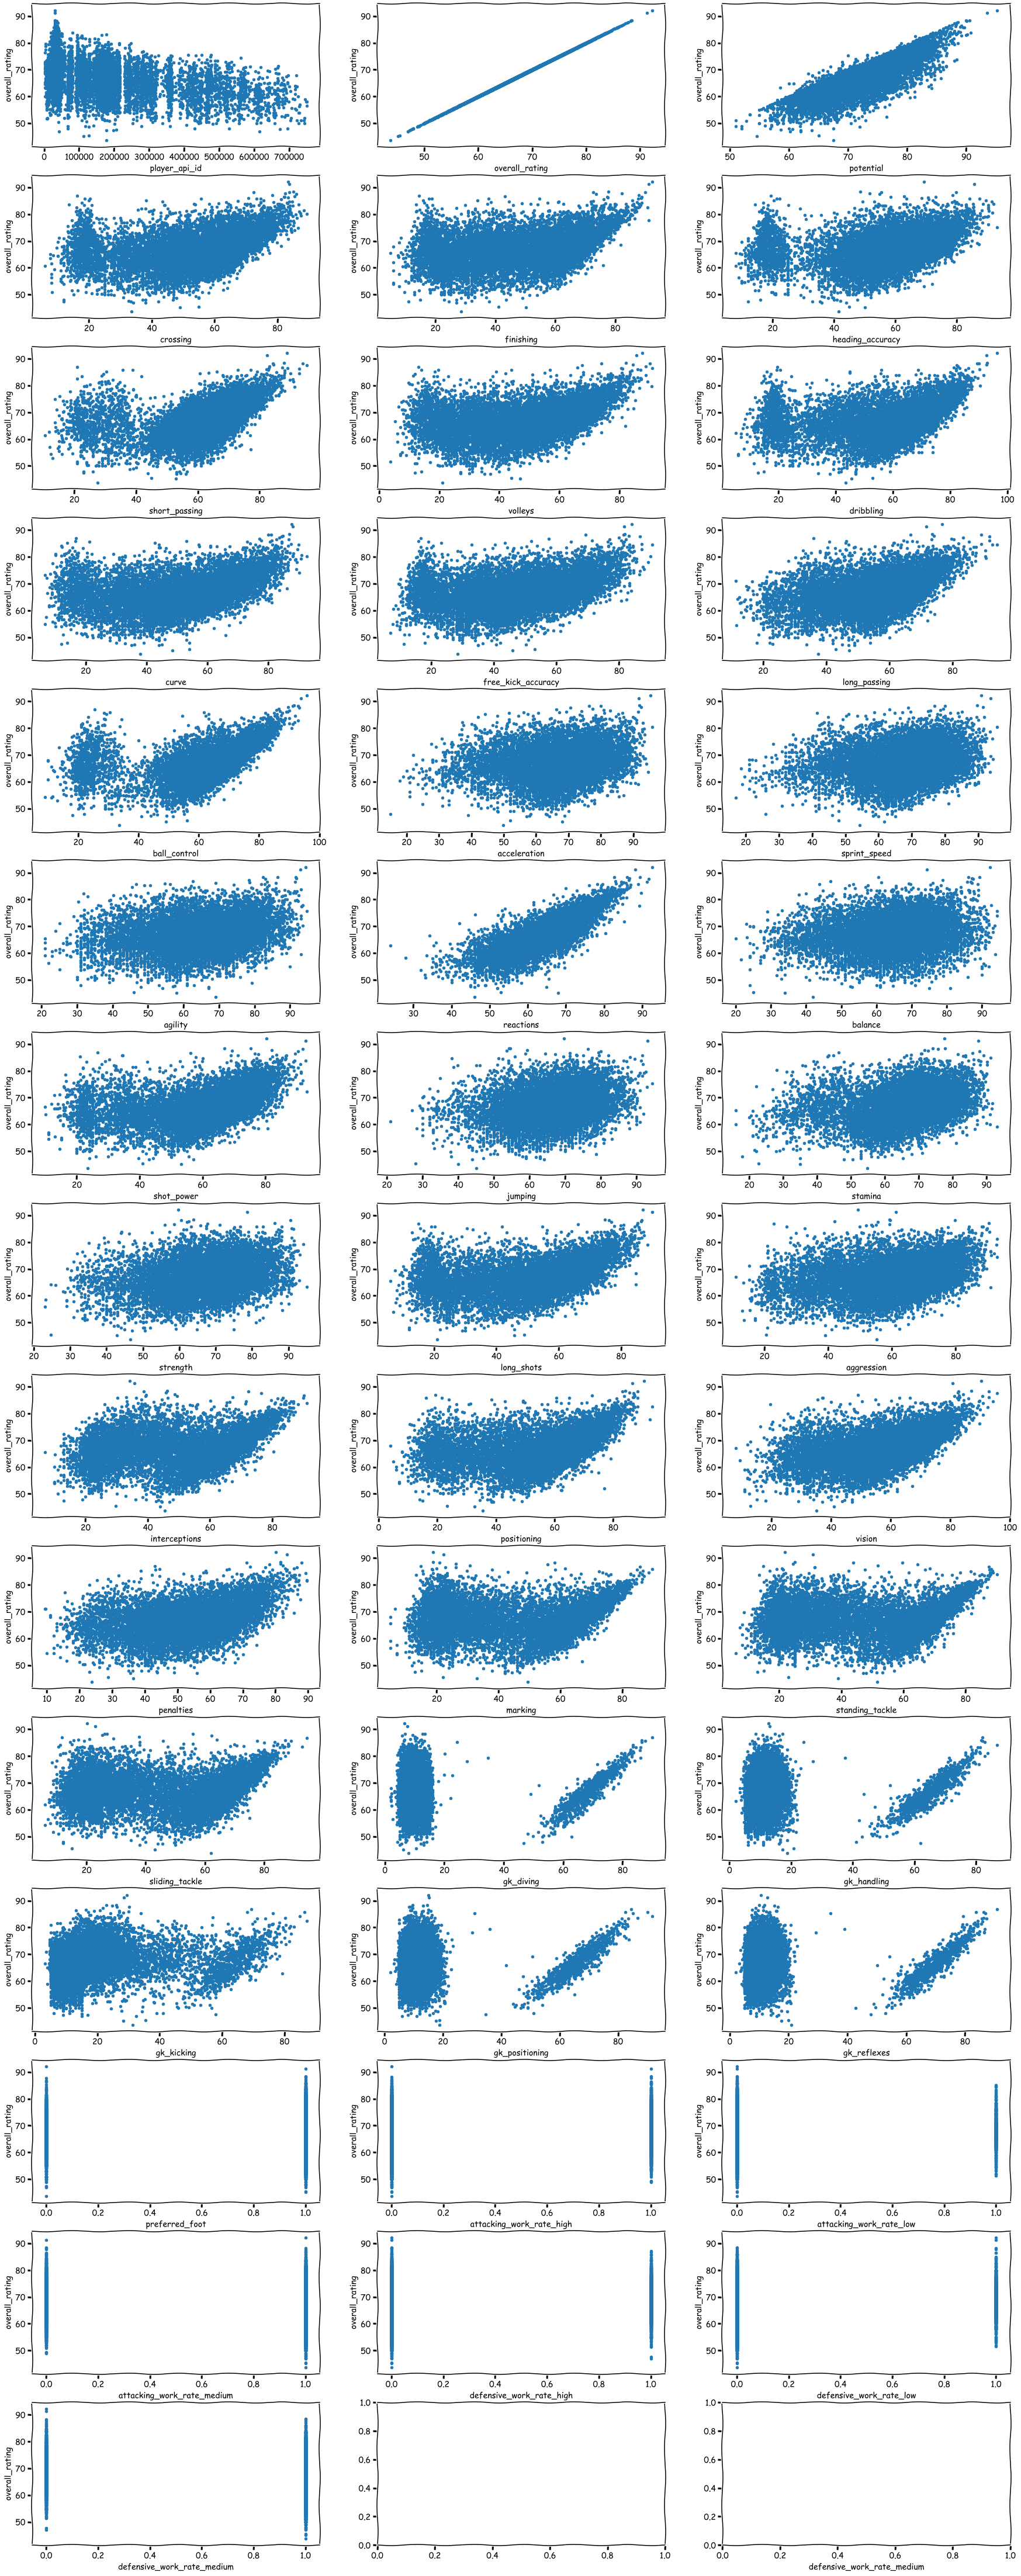

In [28]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(15, 3, figsize=(30, 80))
# unpack all the axes subplots
axe = axs.ravel()
for i in range(len(processed_data.columns)):
    processed_data.plot(kind='scatter', x=processed_data.columns[i], y='overall_rating', ax=axe[i])
    plt.xlabel(processed_data.columns[i])

C:\Users\Urvi\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


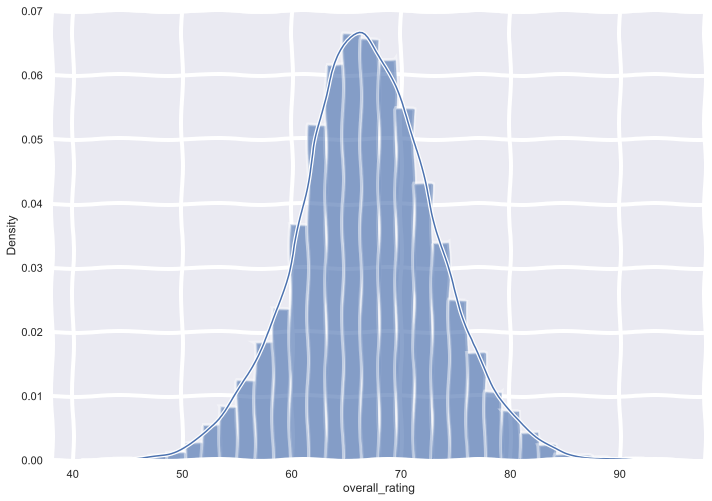

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(processed_data['overall_rating'], bins=30)
plt.show()

In [30]:
correlation_matrix = processed_data.corr().round(2)
# annot = True to print the values inside the square
print(correlation_matrix)

                            player_api_id  overall_rating  potential  \
player_api_id                        1.00           -0.43      -0.03   
overall_rating                      -0.43            1.00       0.80   
potential                           -0.03            0.80       1.00   
crossing                            -0.15            0.34       0.29   
finishing                           -0.08            0.32       0.29   
heading_accuracy                    -0.14            0.30       0.21   
short_passing                       -0.13            0.42       0.39   
volleys                             -0.15            0.38       0.32   
dribbling                           -0.00            0.31       0.34   
curve                               -0.13            0.37       0.33   
free_kick_accuracy                  -0.20            0.37       0.30   
long_passing                        -0.20            0.44       0.37   
ball_control                        -0.09            0.42       

In [31]:
## Checking vif
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"] = X.columns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [32]:
vif

,VIF,Features
0,2.161221,player_api_id
1,2.859756,potential
2,5.976104,crossing
3,9.890948,finishing
4,5.471613,heading_accuracy
5,12.519310,short_passing
6,6.247624,volleys
7,12.943865,dribbling
8,5.585140,curve
9,4.648278,free_kick_accuracy


Observations in VIF:

short_passing, dribbling, ball_control, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_positioning, gk_reflexes have vif > 10

In [33]:
col=['ball_control', 'overall_rating', 'short_passing', 'dribbling', 'marking', 'standing_tackle', 'sliding_tackle', 
     'gk_diving', 'gk_handling', 'gk_positioning', 'gk_reflexes']
X_linear = processed_data.drop(columns=col)

In [34]:
## Checking vif
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_linear.values, i) for i in range(X_linear.shape[1])]
vif["Features"] = X_linear.columns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [35]:
vif

,VIF,Features
0,2.019377,player_api_id
1,2.267004,potential
2,5.295644,crossing
3,8.997160,finishing
4,3.890618,heading_accuracy
5,6.100403,volleys
6,5.476876,curve
7,4.599292,free_kick_accuracy
8,4.177982,long_passing
9,9.827023,acceleration


In [36]:
# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_linear, y, train_size=0.7, shuffle=True, random_state=1)

In [37]:
lm = LinearRegression()
lm.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lm.score(X_train1, y_train1)

0.8721909899356671

In [39]:
lm.score(X_test1, y_test1)

0.8631139900357162

In [40]:
lm = smf.ols(formula='overall_rating ~ '+' + '.join(X_linear.columns), data=processed_data).fit()
lm.conf_int()

,0,1
Intercept,2.107873,2.993115
player_api_id,-0.000009,-0.000008
potential,0.603831,0.626334
crossing,0.010757,0.022916
finishing,0.006786,0.020935
heading_accuracy,-0.005333,0.005477
volleys,-0.002494,0.009707
curve,0.005660,0.017250
free_kick_accuracy,-0.013445,-0.002196
long_passing,0.021343,0.034756


In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     2311.
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:59:52   Log-Likelihood:                -23093.
No. Observations:               10410   AIC:                         4.625e+04
Df Residuals:                   10379   BIC:                         4.647e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.5505      0.226     11.295      0.000       2.108       2.993
player_api_id               -8.28e-06    1.9e-07    -43.516      0.000   -8.65e-06   -7.91e-06
potential                      0.6151      0.006    107.157      0.000       0.604       0.626
crossing                       0.0168      0.003      5.429      0.000       0.011       0.023
finishing                      0.0139      0.004      3.840      0.000       0.007       0.021
heading_accuracy            7.195e-05      0.003      0.026      0.979      -0.005       0.005
volleys                        0.0036      0.003      1.159      0.247      -0.002       0.010
curve                          0.0115      0.003      3.875      0.000       0.006       0.017
free_kick_accuracy            -0.0078      0.003     -2.725      0.006      -0.013      -0.002
long_passing                   0.0280      0.003      8.198      0.000       0.021       0.035
acceleration                  -0.0142      0.006     -2.429      0.015      -0.026      -0.003
sprint_speed                  -0.0059      0.006     -1.064      0.287      -0.017       0.005
agility                       -0.0084      0.004     -2.180      0.029      -0.016      -0.001
reactions                      0.2028      0.004     45.454      0.000       0.194       0.212
balance                        0.0038      0.003      1.160      0.246      -0.003       0.010
shot_power                     0.0116      0.003      3.459      0.001       0.005       0.018
jumping                        0.0220      0.003      7.880      0.000       0.017       0.027
stamina                       -0.0151      0.003     -4.329      0.000      -0.022      -0.008
strength                       0.0498      0.003     15.010      0.000       0.043       0.056
long_shots                    -0.0174      0.004     -4.885      0.000      -0.024      -0.010
aggression                     0.0100      0.003      3.702      0.000       0.005       0.015
interceptions                 -0.0078      0.003     -2.991      0.003      -0.013      -0.003
positioning                   -0.0118      0.003     -3.401      0.001      -0.019      -0.005
vision                         0.0023      0.004      0.643      0.520      -0.005       0.009
penalties                      0.0213      0.003      6.675      0.000       0.015       0.028
gk_kicking                     0.0307      0.002     13.070      0.000       0.026       0.035
preferred_foot                -0.0019      0.053     -0.035      0.972      -0.106       0.102
attacking_work_rate_high       0.8516      0.093      9.132      0.000       0.669       1.034
attacking_work_rate_low        1.1198      0.103     10.829      0.000       0.917       1.322
attacking_work_rate_medium     0.5791      

As p values for heading_accuracy, volleys, sprint_speed, balance, vision and preferred_foot > 0.05, we fail to reject null hypothesis. Hence, there is no correlation between these variables and overall_rating. So, we drop them

In [42]:
X_linear = X_linear.drop(columns=['heading_accuracy', 'volleys', 'sprint_speed', 'balance', 'vision', 'preferred_foot'])
lm = smf.ols(formula='overall_rating ~ '+' + '.join(X_linear.columns), data=processed_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     2888.
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:59:52   Log-Likelihood:                -23096.
No. Observations:               10410   AIC:                         4.624e+04
Df Residuals:                   10385   BIC:                         4.642e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.6170      0.215     12.187      0.000       2.196       3.038
player_api_id              -8.296e-06   1.88e-07    -44.121      0.000   -8.66e-06   -7.93e-06
potential                      0.6148      0.006    108.496      0.000       0.604       0.626
crossing                       0.0167      0.003      5.482      0.000       0.011       0.023
finishing                      0.0152      0.003      4.573      0.000       0.009       0.022
curve                          0.0120      0.003      4.126      0.000       0.006       0.018
free_kick_accuracy            -0.0074      0.003     -2.594      0.010      -0.013      -0.002
long_passing                   0.0291      0.003      9.136      0.000       0.023       0.035
acceleration                  -0.0184      0.004     -4.824      0.000      -0.026      -0.011
agility                       -0.0073      0.004     -1.962      0.050      -0.015   -7.66e-06
reactions                      0.2031      0.004     45.774      0.000       0.194       0.212
shot_power                     0.0116      0.003      3.528      0.000       0.005       0.018
jumping                        0.0224      0.003      8.385      0.000       0.017       0.028
stamina                       -0.0155      0.003     -4.487      0.000      -0.022      -0.009
strength                       0.0481      0.003     15.697      0.000       0.042       0.054
long_shots                    -0.0165      0.004     -4.693      0.000      -0.023      -0.010
aggression                     0.0103      0.003      3.854      0.000       0.005       0.015
interceptions                 -0.0076      0.002     -3.062      0.002      -0.013      -0.003
positioning                   -0.0104      0.003     -3.173      0.002      -0.017      -0.004
penalties                      0.0221      0.003      7.132      0.000       0.016       0.028
gk_kicking                     0.0310      0.002     14.614      0.000       0.027       0.035
attacking_work_rate_high       0.8656      0.091      9.547      0.000       0.688       1.043
attacking_work_rate_low        1.1502      0.100     11.550      0.000       0.955       1.345
attacking_work_rate_medium     0.6012      0.078      7.724      0.000       0.449       0.754
defensive_work_rate_high       0.8874      0.090      9.835      0.000       0.711       1.064
defensive_work_rate_low        1.0297      0.092     11.185      0.000       0.849       1.210
defensive_work_rate_medium     0.6998      0.075      9.318      0.000       0.553       0.847
==============================================================================
Omnibus:                      795.685   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1927.

In [43]:
# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_linear, y, train_size=0.7, shuffle=True, random_state=1)

In [44]:
regression = LinearRegression()
regression.fit(X_train1, y_train1)
linear_score = regression.score(X_test1, y_test1)
linear_score

0.863511040006284

### Decision Tree Regressor Model

In [45]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
dtr.score(X_train, y_train)

1.0

In [47]:
dtr_score = dtr.score(X_test, y_test)
dtr_score

0.8589730610292061

### Random Forest Regressor Model

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.3, random_state=7)

In [50]:
rf = RandomForestRegressor()
rf.fit(x_train2, y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
rf.score(x_train2, y_train2)

0.9924013303203617

In [52]:
rf_score = rf.score(x_test2, y_test2)
rf_score

0.9420321201993997

### Support Vector Regressor Model

In [53]:
svr = SVR()
svr.fit(x_train2, y_train2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
svr.score(x_train2, y_train2)

0.9712385183998505

In [55]:
svr_score = svr.score(x_test2, y_test2)
svr_score

0.9639709904060725

### XG - Boost Regressor Model

In [56]:
xgbr = XGBRegressor()
xgbr.fit(x_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [57]:
xgbr.score(x_train2, y_train2)

0.9960869805278653

In [58]:
xgbr_score = xgbr.score(x_test2, y_test2)
xgbr_score

0.9602613658002433

### Final Scores of all Models

In [59]:
print('Linear Regression Model Score: ', linear_score)
print('Decision Tree Regressor Model Score: ', dtr_score)
print('Random Forest Regressor Model Score: ', rf_score)
print('Support Vector Machine Regressor Model Score: ', svr_score)
print('XGBoost Regressor Model Score: ', xgbr_score)

Linear Regression Model Score:  0.863511040006284
Decision Tree Regressor Model Score:  0.8589730610292061
Random Forest Regressor Model Score:  0.9420321201993997
Support Vector Machine Regressor Model Score:  0.9639709904060725
XGBoost Regressor Model Score:  0.9602613658002433


As seen, support vector machine regressor is giving the best score